# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [21]:
# Importing a few necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from IPython.display import display
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = np.array(city_data.target)
housing_features = np.array(city_data.data)

print "Boston Housing dataset loaded successfully!"










Boston Housing dataset loaded successfully!


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [22]:
# Number of houses in the dataset
total_houses = len(housing_features)

# Number of features in the dataset
total_features = len(housing_features[0])

# Minimum housing value in the dataset
minimum_price = np.min(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.max(housing_prices)

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)


Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answers**: From my personal experience, I think following features are significant, and have strong correlation with price of the house:
- CRIM per capita crime rate by town
- INDUS proportion of non-retail business acres per town
- DIS weighted distances to five Boston employment centres









## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [23]:
print CLIENT_FEATURES


[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: ** 
Index 0,2,7 of CLIENT_FEATURES are corresponds to CRIM, INDUS and DIS respectively.

- CRIM: Median value of CRIM from whole dataset is 0.26, where CLIENT_FEATURES shows that **11.95** which is great difference.

- INDUS: Median value of INDUS from whole dataset is 9.69, and mean value of INDUS is 11.14. Again, CLIENT_FEATURES shows significant difference of **18.1**.

- DIS: Median / Mean value of DIS from whole dataset is 3.21/3/80 respectively. CLIENT_FEATURES shows that it is significantly lower than these of **1.385**.



Based on these data, this house shows significant higher crime rate, but it is very industrialzed, and is very close to Boston employment areas. Thus it will be higher than both mean/median value of Boston houses.















# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [42]:
from sklearn import cross_validation as cv

def shuffle_split_data(X, y):
    X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=0.3)
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Question 3
*Why do we split the data into training and testing subsets for our model?*

**Answer: ** One obvious reason is 'To measure performance of the model, we split data into two subsets; training set & test set. Model fitting is done using training set, and evaluation will be done using test set. Better convincing reason will be covered later of this project, but if all the datas are used for training, there is higher chance that the prediction model is over-fitted. To prevent this we can split the data into training and testing dataset using cross validation.

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [43]:
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    error = mean_squared_error(y_true, y_predict)
    return error



# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: ** Generally speaking, predicting house price based on multiple features is a regression problem, will be well presented when regression model is used, and classification has little room to jump in. In the same sense, Accuracy, Precision, Recall, F1 score are not suitable for this particular problem, you'd rather save them for other (binary) classification problem. 

I selected MSE as loss function as it will represent bias or variance most of the time, plus it will reduce outlier since error is squared, where MAE should also work in decent manner. There is an article stating that MAE might be proper if you want to fit model to median, where MSE will fit the model to mean.

http://stats.stackexchange.com/questions/48267/mean-absolute-error-or-root-mean-squared-error
https://forecasters.org/wp-content/uploads/gravity_forms/7-621289a708af3e7af65a7cd487aee6eb/2015/07/Kolassa_Stephan_ISF2015.pdf
http://www.sciencedirect.com/science/article/pii/S0169207016000315

To see either MAE or MSE is better, I need to fit the model first. So I will leave which one to choose as an open item.

** 2nd Review: ** 
I apologize if this has been missed out in the previous review though there is a mistake in the rationale: The sentence: “... selected MSE as loss function as it will represent bias or variance most of the time, plus it will reduce outlier since error is squared” is not correct, it is quite the opposite because of squaring if there where outliers in the data they would be over-weighted not reduced. If you have outliers in your data set you would want to remove them not to give them more weight, what the mean squared error is doing is penalizing high errors which is not the same as outliers, and penalizing high errors is good. Squaring outliers would be bad because you would allow the algorithm to give a lot of importance to data that should not be there (outliers).

Bottom line: If we think we have outliers we should not use the mean squared error but we should use some measures robust to outliers. If we don't think we have outliers its fine to use the mean squared error to penalize high errors.

** Updated Answer: ** 
I completely agree and understand that MSE is not robust when there is outlier in the dataset. In such cases we need to think about other metrics even MAE will be better choice than MSE.



## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 3**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [44]:
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV


def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """
    regressor = DecisionTreeRegressor()
    
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}
    
    scoring_function = make_scorer(performance_metric, greater_is_better=False)
    
    reg = GridSearchCV(estimator=regressor, param_grid=parameters, scoring=scoring_function)
    
    reg.fit(X, y)
    
    return reg.best_estimator_

# There was an error while keep fitting model to answer question 10. It has been fixed.


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **

Grid search algorithm, especially the one we used in above code snippet is an implemntation of *Hyperparameter optimization*, and it continually search problem space (features and parameters of fitting model), to find lowest error (argmin error). Here error (loss function) is measured from multiple cross validation, and with this exhaustive seach, goal is to find minimum error, and thus find the best fitting model.

Grid search algorithm can be extensively used for general fitting model to find best parameters (or weight).


## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: ** When estimating the model, we generally try to find the model with the minimum error. In this case over-fitted model outperform any other model, but this will not represent general model, or any unobserved data.

Cross-validation is used to avoid the above situation, by partitioning given dataset into randomly selected to subsets; training set & test set. To increase represantive power, multiple round of cross validation may be performed. Using training set to generate a model, and testing is performed with test set. If new model generates less error, pick it. And these steps continue until certain condition is met.

Cross validation comes in the picture of Grid search method, as a error function; error of cross validation will be used to measure performance of parameter (or weight) that Grid search algorithm is currently matching.




# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [45]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        for i, s in enumerate(sizes):
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])
            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [46]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


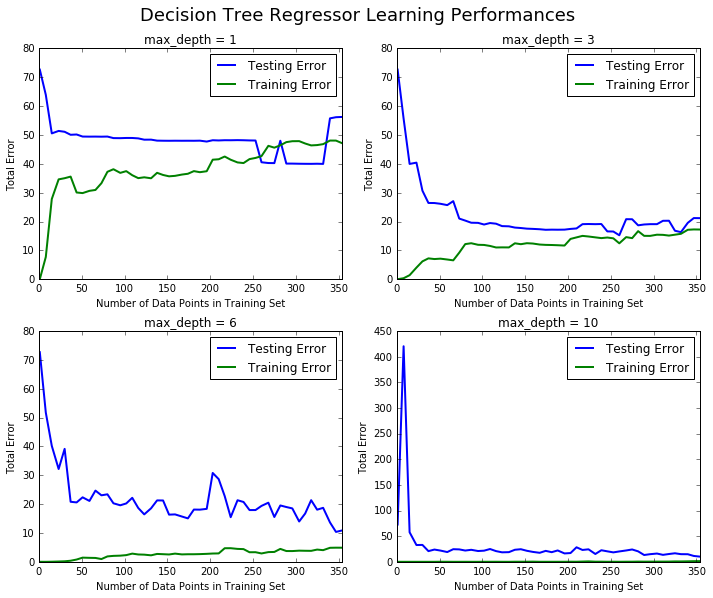

In [47]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: ** For this question, I will use the case where **max_depth=6**.
- Training Error
    - Training error increases gradually until size of training set is around 200.
    - As the size of training set increases, it has tendency that training error increases, but total error is relatively smaller than testing error.
- Testing Error
    - Testing error is very high if size of training set is below 50
    - Testing error fluctuate after size of training set is over 50, but has tendency that in reduces as size of training set increases.

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **

- **max_depth=1**
    - When full training set is used, it fails to predict half of whole test set / training set.
    - Since grid search go through only 1 depth, decision tree will only use one feature to predict the data, which will fail half of the dataset.
- **max_depth=10**
    - In this case, there is very low bias with training set, but shows significant greater error with testing set.
    - This seems to be typical result of over-fitting, and yes, testing set suffers from high variance.
    
    
**Review:** Student provides analysis for both a max depth of 1 and a max depth of 10. Reasonable justification is given for each graph if the model suffers from high bias or high variance.
For 'max depth' 10 you are correct , the model suffer from high variance. In the chart we can see that as the low error for the training curve and the difference between the training and high testing curves.

Please specify if 'max depth' 1 suffer from high bias or high variance. In addition it is stated "it fails to predict half of whole test set / training set", Please describe how we can see that in the relevant chart.


**Updated answer: ** In case of **max_depth==1**, it does show high bias, or in other words this model is under fitted. 'fails to predict half of data set' was simply meaning that error rate is 50% in both cases.

**2nd Review: **
It is true that with max depth 1 we have high bias, your rationale should be based on the analysis of the curves. What makes you suspect that we have high bias there? Hints: For instance are the training and testing error high or low? Please note that there is no improvement adding new data, what does that mean?

I'm not sure why you mention predicting half of the data, what makes you think that the model is getting 50% of the cases right? Could you please provide some evidence regarding that?

**Updated Answer: **
First, 'I'm not sure why you mention predicting half of the data, what makes you think that the model is getting 50% of the cases right? Could you please provide some evidence regarding that?', at the time I fit the model, and in case of **max_depth=1**, both test error and training error was saturated in 50% regardless of how training data set size is. But you you are aware of, this is not the always case, as model fit is done randomly using grid search. So my answer was valid, but you cannot see it as graph and model is gone.

High bias means that your prediction model itself is not well representing actual model, which is why it is sometimes called under-fitted. It also means that when the model is being used for testing, it shows high error. Comparing with **max_depth=1** and **max_depth=10**, the former shows significantly high testing error, where **max_depth=10** shows less error.


Creating a model complexity graph. . . 


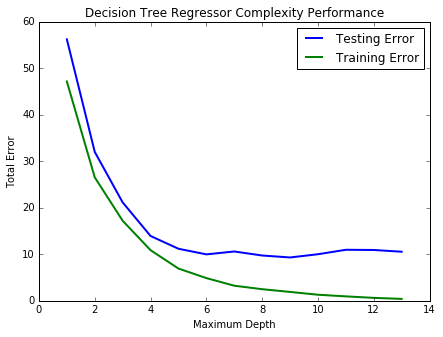

In [48]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **

- This graph represent typical over-fitting of model.
- As maximum depth increases, decision tree model will be able to fit better with training set, and thus training error reduces.
- But for testing error, once it saturate in certain value, but once the number of **max_depth** is increasing, testing error also increases.
- Based on Occam's razor princicple, and result from testing error, I will choose **max_depth=6**

# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [49]:
print "Final model has an optimal max_depth parameter| of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter| of 4


**Answer: ** It appears that exhastive search's result is 8 because total error from testing error is slightly smaller than case when **max_depth=6**. But still difference between these 2 cases are relatively samll, and again, using Occam's razor principle, I think **max_depth=6** is the reasonable choice.

**Review: ** 'max depth' 8 is too high result, please run the grid search few times (~10) and report the median value. Optional, can you explain what might be causing the variation in the optimal 'max depth'?

**Updated Answer: ** I tried to run 7 times and here is the actual result: [4,5,5,4,4,7,4]. So median value is 4.

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [41]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 19.327


**Answer: ** I predicted that the CLIENT_FEATURES's price will be higher than both mean/median value of Boston house, but it does not seem to be right according to the fitted model. 

My prediction was based on 3 most important feature while not considering any other features; CRI/INDUS/DIS, and it produced the opposite way of prediction.

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: ** 

No matter what we choouse **max_depth**, this model still shows average error rate of around 20%. I do not think this is robust enough to predict future clients home in Greater Boston area. 

- Original data was acquired from 'suburbs of Boston' which does not represent central city area or any are where it does not show characteristic of suburban area.
    - To tackle this, more samples from various are need be to collected.
    - Also, to cover new area, new features need to be introduced to distinguish characteristic of area
- Number of sample is too small. Only 506 samples were acquired, and it is not robust enough (showing approximately 20% error in best case) to predict future client's selling price.
    - To tackle this, large enough dataset is needed

